In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd 'drive/MyDrive/GitHub/master-thesis'

/content/drive/MyDrive/GitHub/master-thesis


In [4]:
from clustering.utils import *

# Experiments

In [5]:
restart_experiments = False
methods = ['gmm_full', 'gmm_tied', 'gmm_diag', 'gmm_spherical', 'kmeans']
list_n_cluster = np.arange(2,8,1)
list_n_cluster

array([2, 3, 4, 5, 6, 7])

In [6]:
if restart_experiments:
  # Create Empty Dictionary
  dict_results = {}
  for method in methods:
    dict_temp = {}
    for n_cluster in list_n_cluster:
      dict_entry = {'silhouette_score': np.nan, 'ch_score': np.nan, 'db_score': np.nan, 'model_specific_score': np.nan}
      dict_temp.update({n_cluster:dict_entry})
    dict_results.update({method: dict_temp})

In [7]:
if restart_experiments:
  # Experiments
  cov_type='full'
  for method in methods:
    method_name = method
    if method[:3]=='gmm':
      method_name = method.rsplit('_')[0]
      cov_type = method.rsplit('_')[1]
    for n_cluster in list_n_cluster:
      df, cluster_input_cols, answers_train, answers, labels, model_specific_score = get_cluster_data(n_cluster=n_cluster, method=method_name, cov_type=cov_type, cluster_input_data='fa_data', start_train='2020-07-31', end_train='2020-12-01')
      dict_results[method][n_cluster]['silhouette_score'] = metrics.silhouette_score(answers, labels, metric='euclidean')
      dict_results[method][n_cluster]['ch_score'] = metrics.calinski_harabasz_score(answers, labels)
      dict_results[method][n_cluster]['db_score'] = metrics.davies_bouldin_score(answers, labels)
      dict_results[method][n_cluster]['model_specific_score'] = model_specific_score

In [8]:
if restart_experiments:
  # Transform Dictionary to DataFrame
  df_results = pd.DataFrame(columns=['method', 'number_cluster', 'silhouette_score', 'ch_score', 'model_specific_score'])
  for method in methods:
    df_temp = pd.DataFrame.from_dict(dict_results[method], orient='index')
    df_temp['number_cluster'] = df_temp.index
    df_temp['method'] = method
    df_results = df_results.append(df_temp)
  df_results.reset_index(inplace=True, drop=True)
  df_results.to_csv('results/clustering/results_clustering.csv', index=False)
  df_results

In [9]:
if restart_experiments == False:
  df_results = pd.read_csv('results/clustering/results_clustering.csv')

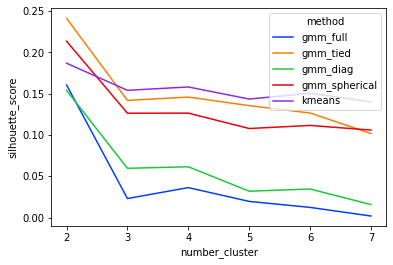

In [10]:
sns.lineplot(data=df_results, x='number_cluster', y='silhouette_score', hue='method', palette='bright') # Close to 1

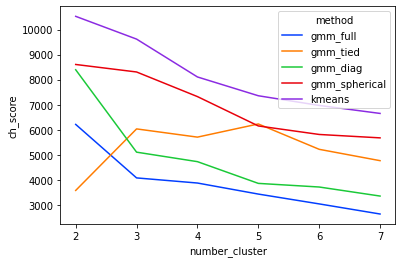

In [11]:
sns.lineplot(data=df_results, x='number_cluster', y='ch_score', hue='method', palette='bright') # Maximize

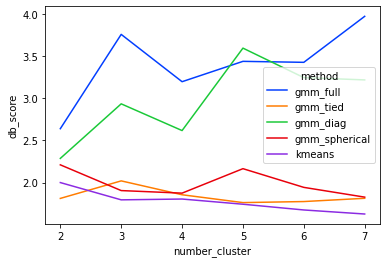

In [12]:
sns.lineplot(data=df_results, x='number_cluster', y='db_score', hue='method', palette='bright') # close to zero

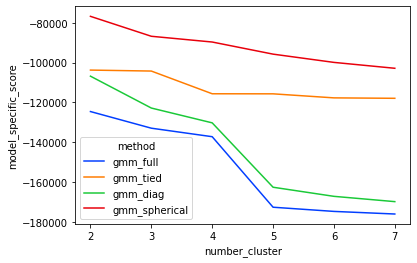

In [13]:
sns.lineplot(data=df_results[df_results['method']!='kmeans'], x='number_cluster', y='model_specific_score', hue='method', palette='bright') # BIC - Minimize / find elbow

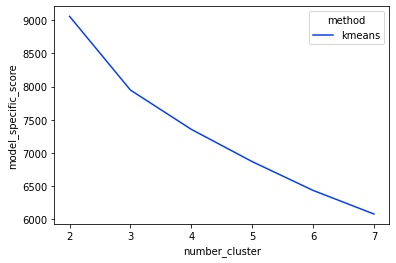

In [14]:
sns.lineplot(data=df_results[df_results['method']=='kmeans'], x='number_cluster', y='model_specific_score', hue='method', palette='bright') # Find elbow

# Test Rand Score

In [15]:
methods = ['gmm_full', 'gmm_tied', 'gmm_diag', 'gmm_spherical', 'kmeans']
avg_rand_scores = []
for n_cluster in list_n_cluster:
  cum_rand_scores = 0
  for method_1 in methods:
    df_1 = pd.read_csv('data/clustering/' + method_1 +'_' + str(n_cluster) + '.csv')
    labels_1 = df_1['group'].to_numpy()
    for method_2 in methods:
      df_2 = pd.read_csv('data/clustering/' + method_2 +'_' + str(n_cluster) + '.csv')
      labels_2 = df_2['group'].to_numpy()
      rand_score = metrics.adjusted_rand_score(labels_1, labels_2)
      
      #print(str(n_cluster) + ' Cluster - Comparing ' + method_1 + ' with ' + method_2 + ' - Rand Score: ' + str(rand_score))
      cum_rand_scores = cum_rand_scores + rand_score
  avg_rand_score = (cum_rand_scores-len(methods)) / ((len(methods)-1)*len(methods))
  avg_rand_scores.append(avg_rand_score)
  print(str(n_cluster) + ' Cluster with average rand score: ' + str(avg_rand_score))

2 Cluster with average rand score: 0.304111528118983
3 Cluster with average rand score: 0.26461257965244184
4 Cluster with average rand score: 0.26157251208887466
5 Cluster with average rand score: 0.2485138963674567
6 Cluster with average rand score: 0.26058043573703343
7 Cluster with average rand score: 0.2369184566136317


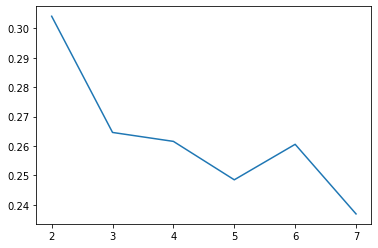

In [16]:
plt.plot(list_n_cluster, avg_rand_scores)
plt.show()